# Case Study: Apple Stock Prices Predicton

<img src="https://github.com/ijoseff/ijoseff.github.io/blob/master/assets/img/portfolio/apple.png?raw=true" width="500" height="250" />

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Case-Study:-Apple-Stock-Prices-Predicton" data-toc-modified-id="Case-Study:-Apple-Stock-Prices-Predicton-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Case Study: Apple Stock Prices Predicton</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Libaries-and-Data-Importation" data-toc-modified-id="Libaries-and-Data-Importation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Libaries and Data Importation</a></span></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Exploration</a></span></li><li><span><a href="#Data-Pre-processing" data-toc-modified-id="Data-Pre-processing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Pre-processing</a></span></li><li><span><a href="#Model-Creation" data-toc-modified-id="Model-Creation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model Creation</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model Evaluation</a></span></li><li><span><a href="#Another-Prediction" data-toc-modified-id="Another-Prediction-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Another Prediction</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Introduction

This is an another attempt to predict the future stocks of a certain company. In this project, an artificial recurrent neural network called Long Short Term Memory (LSTM) will be now use to predict the closing stock price of a corporation (Apple Inc.).

The project goes through following steps: Data generation, Data pre-processing and feature selection, Baseline prediction, LSTM training and demonstration of results.

**Problem:**
 - Predict the stock price at a certain date

**Dataset:**
 - Historical data of APL Inc

**Source:** Yahoo Finance

# Libaries and Data Importation

In [9]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For calculation and web scrape
import math
import pandas_datareader as web

# For preprocessing and model building
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Style settings
sns.set()
plt.style.use('fivethirtyeight')

In [95]:
# Get stack quote
df = web.DataReader('AAPL', data_source = 'yahoo', start = '2012-01-01', end = '2020-07-13')

# Data Exploration

In [96]:
# Show the data
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792


In [10]:
# Check data dimension
df.shape

(2145, 6)

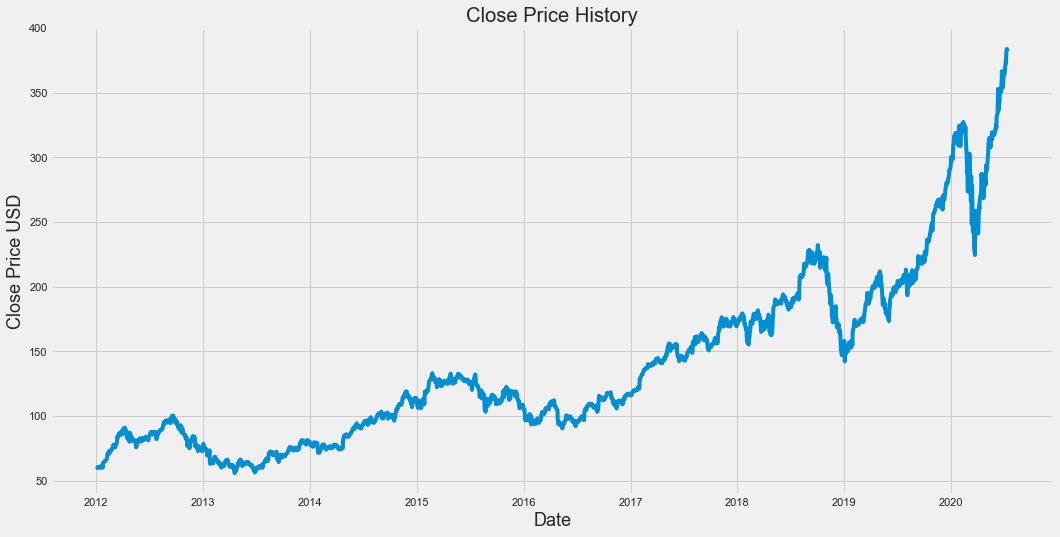

In [12]:
# Visualize the closing price
plt.figure(figsize = (16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()

# Data Pre-processing

In [18]:
# Create new dataframe with the 'Close' column
data = df.filter(['Close'])

# Convert dataframe into a numpy array
dataset = data.values

# Get the number of rows to train the model on # math.ceil -> Round up
training_data_len = math.ceil(len(dataset)* 0.8)

# Check the data length
training_data_len

1716

In [21]:
# Scale the data
scaler = MinMaxScaler(feature_range = (0,1))

# Fit and transform the data
scaled_data = scaler.fit_transform(dataset)

# Check the data
scaled_data;

In [36]:
# Create the training dataset
# Create the scaled training dataset
train_data = scaled_data[0: training_data_len, :] # Get all the data from 0 to training_data_len, all column

# Split the data
X_train = []
y_train = []

for i in range (60, len(train_data)):
    X_train.append(train_data[i - 60:i, 0])
    y_train.append(train_data[i, 0])
    if i <=61:
        print(X_train) # Past 60 days
        print(y_train) # target label
        print()

[array([0.0090187 , 0.00998157, 0.01198137, 0.01388532, 0.01359341,
       0.01425129, 0.01395067, 0.01344527, 0.01275689, 0.01488739,
       0.01680877, 0.01621624, 0.01297038, 0.0160681 , 0.0130183 ,
       0.02445506, 0.02357062, 0.02472519, 0.02722167, 0.02873349,
       0.02860715, 0.02814097, 0.0301277 , 0.03199678, 0.03411423,
       0.03753437, 0.04471883, 0.04482775, 0.04882736, 0.05181615,
       0.04667941, 0.04865743, 0.04861822, 0.05416451, 0.05337591,
       0.05483545, 0.05745828, 0.05891785, 0.06312222, 0.0661851 ,
       0.06706952, 0.06737887, 0.06214193, 0.06087842, 0.06106578,
       0.06598902, 0.06737452, 0.07035024, 0.07736479, 0.08672334,
       0.08497187, 0.08497623, 0.09174244, 0.09385987, 0.09235239,
       0.09097564, 0.08954223, 0.09430427, 0.09757193, 0.09893998])]
[0.09555904727802514]

[array([0.0090187 , 0.00998157, 0.01198137, 0.01388532, 0.01359341,
       0.01425129, 0.01395067, 0.01344527, 0.01275689, 0.01488739,
       0.01680877, 0.01621624, 0.01

In [37]:
# Convert the X_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

In [41]:
# Reshape the data # LSTM needs 3 dimensional data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1656, 60, 1)

# Model Creation

In [42]:
# Build the LSTM model # X_train.shape[1] = 60
model = Sequential()

# First layer
model.add(LSTM(50, return_sequences = True, input_shape = (X_train.shape[1], 1)))

# Second layer
model.add(LSTM(50, return_sequences = False))

# Third layer
model.add(Dense(25))

# Last layer
model.add(Dense(1))

In [43]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [44]:
# Train the model
model.fit(X_train, y_train, batch_size = 1, epochs = 1)

1656/1656 [==============================] - 144s 87ms/step - loss: 3.9337e-04


# Model Evaluation

In [48]:
# Create the testing dataset
# Create a new array containing scaled values from index 1656 to 2145
test_data = scaled_data[training_data_len - 60:, :]

# Create the datasets X_test and y_test
X_test = []
y_test = dataset[training_data_len:, :] # 60 first actual values, not scaled

for i in range(60, len(test_data)):
    X_test.append(test_data[i - 60:i, 0]) # Past 60 values

In [50]:
# Convert the data to a numpy array to be able to use in LSTM model
X_test = np.array(X_test)

In [52]:
# Check the shape
X_test;

In [54]:
# Reshape the data for LSTM model. It needs 3 dimensional data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [55]:
# Get the models predicted price values
predictions = model.predict(X_test)

# Get the inverse shape of the data
predictions = scaler.inverse_transform(predictions)

In [58]:
# Evaluate the model
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)

# Show the rmse
print('rmse:', rmse)

rmse: 6.095267876044853


<ipython-input-80-17b94435c8f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


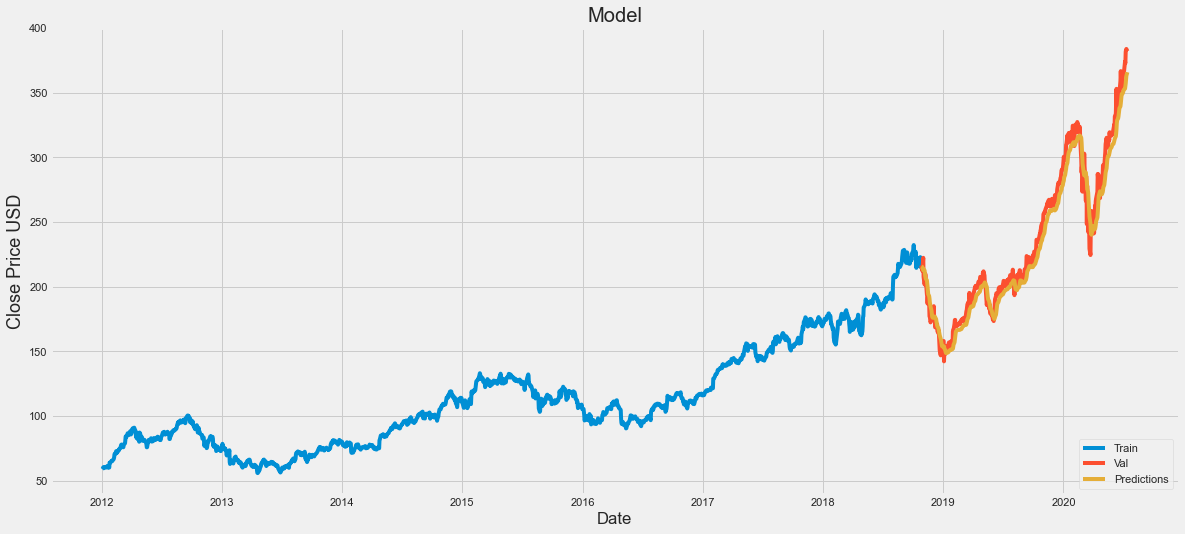

In [80]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize = (18, 8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [66]:
# Show the valid (Actual price) and predicted prices
valid

,Close,Predictions
Date,,
2018-10-26,216.300003,215.546387
2018-10-29,212.240005,215.108917
2018-10-30,213.300003,214.077057
2018-10-31,218.860001,213.038071
2018-11-01,222.220001,212.820068
...,...,...
2020-07-07,372.690002,354.960175
2020-07-08,381.369995,356.941803
2020-07-09,383.010010,359.823456


# Another Prediction

In [91]:
# Get stack quote
apple_quote = web.DataReader('AAPL', data_source = 'yahoo', start = '2012-01-01', end = '2020-07-13')

# Create a new dataframe 
new_df = apple_quote.filter(['Close'])

# Get the last 60 days closing price values and convert the dataframe to an array
last_60_days  = new_df[-60:].values

# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list
X_test = []

# Append the past 60 days
X_test.append(last_60_days_scaled)

# Convert the X_test dataset to a numpy array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price
pred_price = model.predict(X_test)

# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print('Predicted price at July 14, 2020 is', np.round(pred_price))

Predicted price at July 14, 2020 is [[368.]]


In [92]:
# Get stack quote
apple_quote_2 = web.DataReader('AAPL', data_source = 'yahoo', start = '2020-07-14', end = '2020-07-14')

# Show the actual price
print('Actual price at July 14, 2020 is', np.round(apple_quote_2['Close'][1]))

Actual price at July 14, 2020 is 383.0


# Conclusion

The project concludes that LSTM neural network can be good alternative for stock market time series prediction among other machine learning methods.Further testing of different parameter and architecture settings are needed to improve the accuracy.